In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [59]:
movie = pd.read_csv('movie.csv')
movie

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)


In [60]:
rating = pd.read_csv('rating.csv')
rating

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40
...,...,...,...,...
13213821,91288,1269,5.0,1999-12-14 15:00:32
13213822,91288,1270,4.0,1999-12-14 14:58:42
13213823,91288,1276,5.0,1999-12-14 14:58:12
13213824,91288,1278,5.0,1999-12-14 14:59:20


In [61]:
movies = pd.merge(movie, rating, on = 'movieId')
movies

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,1999-12-11 13:36:47
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0,1997-03-13 17:50:52
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,1996-06-05 13:37:51
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,4.0,1999-11-25 02:44:47
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5,2009-01-02 01:13:41
...,...,...,...,...,...,...
13213821,131252,Forklift Driver Klaus: The First Day on the Jo...,Comedy|Horror,79570,4.0,2015-03-30 19:20:55
13213822,131254,Kein Bund für's Leben (2007),Comedy,79570,4.0,2015-03-30 19:32:59
13213823,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,79570,4.0,2015-03-30 19:48:08
13213824,131258,The Pirates (2014),Adventure,28906,2.5,2015-03-30 19:56:32


In [62]:
movies.isna().sum()

movieId      0
title        0
genres       0
userId       0
rating       0
timestamp    0
dtype: int64

In [63]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13213826 entries, 0 to 13213825
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   title      object 
 2   genres     object 
 3   userId     int64  
 4   rating     float64
 5   timestamp  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 705.7+ MB


In [64]:
movies.describe()

,movieId,userId,rating
count,1.321383e+07,1.321383e+07,1.321383e+07
mean,9.072686e+03,4.551722e+04,3.525000e+00
std,1.981872e+04,2.644967e+04,1.052461e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,9.030000e+02,2.256900e+04,3.000000e+00
50%,2.174000e+03,4.546800e+04,3.500000e+00
75%,4.809000e+03,6.848500e+04,4.000000e+00
max,1.312600e+05,9.128800e+04,5.000000e+00


In [65]:
movies['userId'].value_counts()[:10]

8405     7515
82418    5646
74142    5447
34576    5356
83090    5169
59477    4988
79159    4707
8963     4524
15617    4354
71975    4182
Name: userId, dtype: int64

In [66]:
user = 7201

user_data = movies[movies['userId'] == user]

genre_count = user_data['genres'].str.split('|', expand=True).stack().value_counts()

print(f"Genres liked by user {user}:\n{genre_count}")


Genres liked by user 7201:
Drama          1359
Comedy          912
Thriller        894
Action          693
Horror          570
Adventure       513
Romance         487
Crime           440
Sci-Fi          421
Fantasy         312
Mystery         270
Children        224
Animation       215
Musical         141
War             127
IMAX             91
Western          50
Documentary      48
Film-Noir        38
dtype: int64


In [67]:
selected_user = 3907

user_data = movies[movies['userId'] == selected_user]

genre_counts = user_data['genres'].str.split('|', expand=True).stack().value_counts()

print(f"Genres liked by user {selected_user}:\n{genre_counts}")

Genres liked by user 3907:
Drama          1407
Thriller        848
Comedy          829
Action          616
Crime           455
Adventure       437
Romance         394
Sci-Fi          345
Horror          300
Fantasy         262
Mystery         251
Children        160
War             131
Animation       125
Documentary     112
IMAX             79
Musical          76
Western          50
Film-Noir        37
dtype: int64


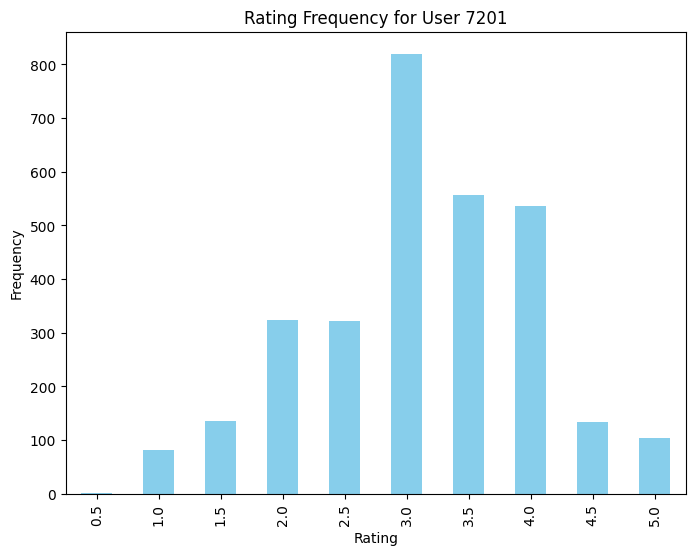

In [68]:
user = 7201

data = movies[movies['userId'] == user]

rating_counts = data['rating'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
rating_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title(f'Rating Frequency for User {user}')
plt.show()

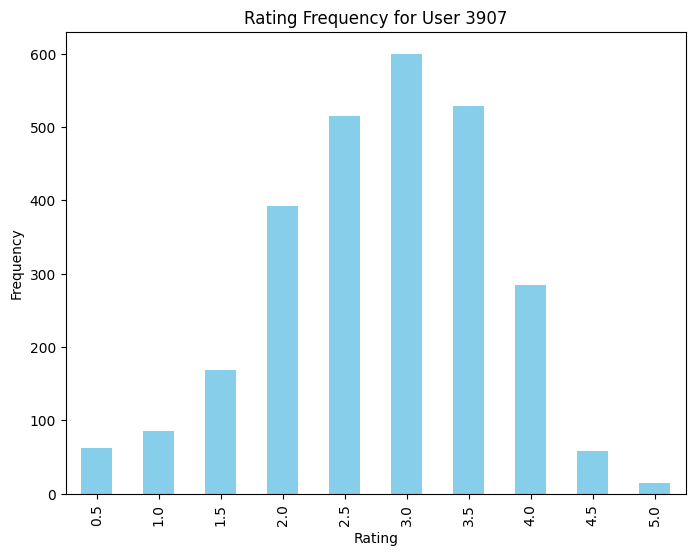

In [69]:
user = 3907

data = movies[movies['userId'] == user]

rating_counts = data['rating'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
rating_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title(f'Rating Frequency for User {user}')
plt.show()

In [70]:
movies['title'].value_counts()[:10]

Pulp Fiction (1994)                          44364
Forrest Gump (1994)                          43590
Shawshank Redemption, The (1994)             41741
Silence of the Lambs, The (1991)             41678
Jurassic Park (1993)                         39421
Star Wars: Episode IV - A New Hope (1977)    35919
Braveheart (1995)                            35462
Terminator 2: Judgment Day (1991)            34377
Matrix, The (1999)                           33854
Schindler's List (1993)                      33063
Name: title, dtype: int64

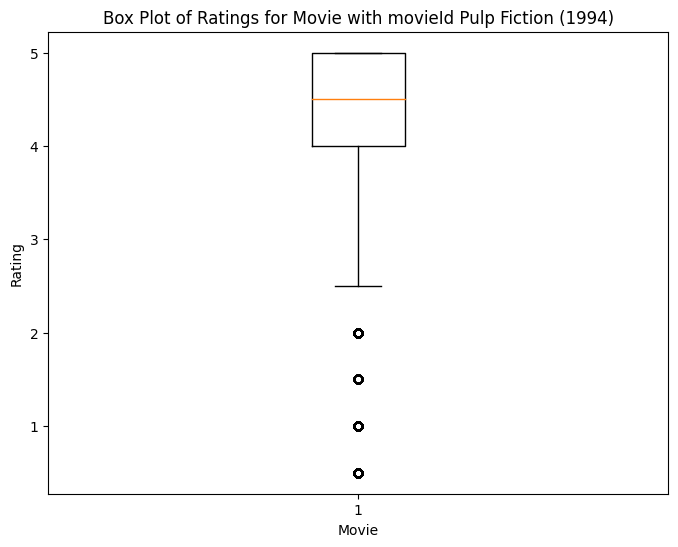

In [71]:
movie_name = 'Pulp Fiction (1994)'

selected_movie_data = movies[movies['title'] == movie_name]

plt.figure(figsize=(8, 6))
plt.boxplot(selected_movie_data['rating'])
plt.xlabel('Movie')
plt.ylabel('Rating')
plt.title(f'Box Plot of Ratings for Movie with movieId {movie_name}')
plt.show()

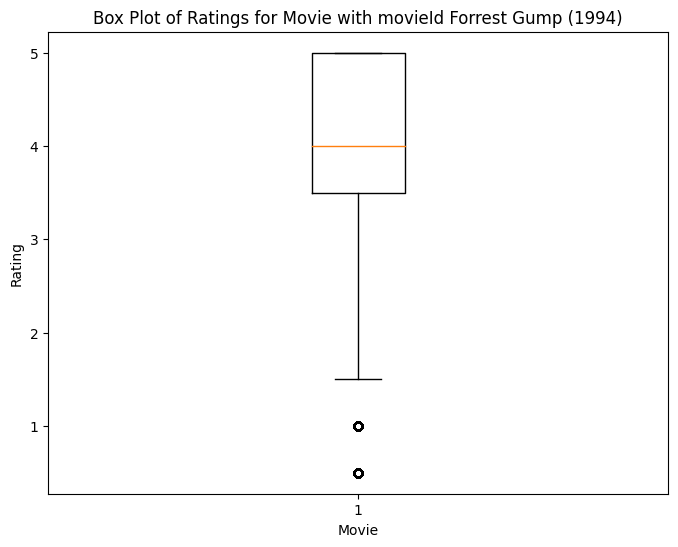

In [72]:
movie_name = 'Forrest Gump (1994)'

selected_movie_data = movies[movies['title'] == movie_name]

plt.figure(figsize=(8, 6))
plt.boxplot(selected_movie_data['rating'])
plt.xlabel('Movie')
plt.ylabel('Rating')
plt.title(f'Box Plot of Ratings for Movie with movieId {movie_name}')
plt.show()

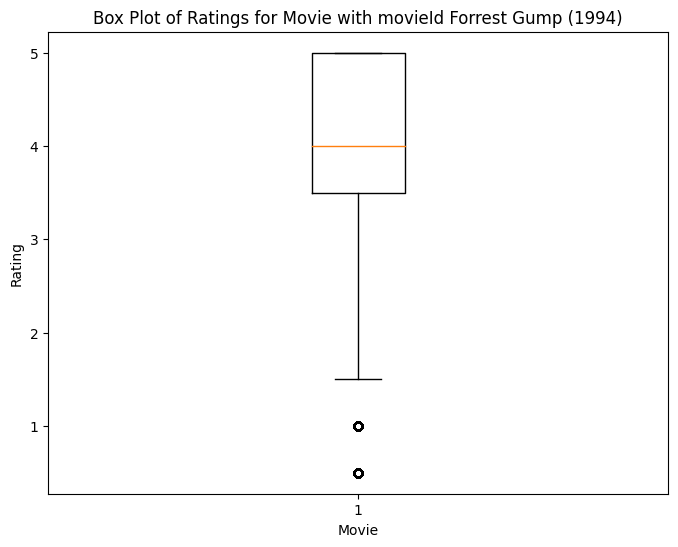

In [73]:
movie_name = 'Forrest Gump (1994)'

selected_movie_data = movies[movies['title'] == movie_name]

plt.figure(figsize=(8, 6))
plt.boxplot(selected_movie_data['rating'])
plt.xlabel('Movie')
plt.ylabel('Rating')
plt.title(f'Box Plot of Ratings for Movie with movieId {movie_name}')
plt.show()

In [74]:
movies['genres'].value_counts().count()

1302

In [75]:
movies['genres'].value_counts()[:10]

Drama                        967278
Comedy                       871737
Comedy|Romance               525136
Comedy|Drama                 433816
Drama|Romance                425301
Comedy|Drama|Romance         407675
Crime|Drama                  308984
Action|Adventure|Sci-Fi      291478
Action|Adventure|Thriller    207233
Action|Crime|Thriller        204723
Name: genres, dtype: int64

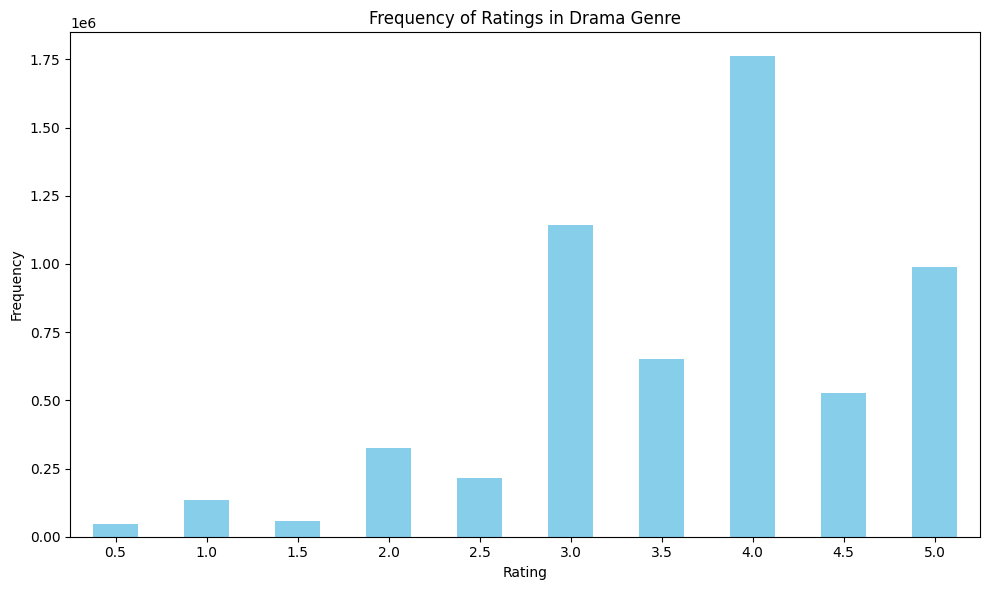

In [76]:
genre = 'Drama'

selected_genre_data = movies[movies['genres'].str.contains(genre)]

rating_counts = selected_genre_data['rating'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title(f'Frequency of Ratings in {genre} Genre')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

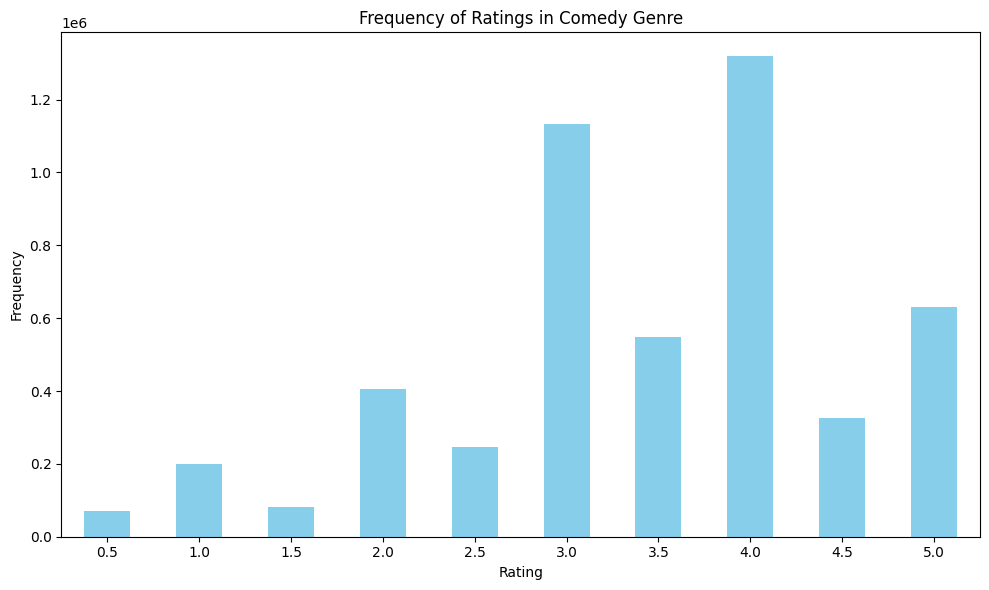

In [77]:
genre = 'Comedy'

selected_genre_data = movies[movies['genres'].str.contains(genre)]

rating_counts = selected_genre_data['rating'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title(f'Frequency of Ratings in {genre} Genre')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
